In [89]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('predimed.csv')
df

,group,sex,age,smoke,bmi,waist,wth,htn,diab,hyperchol,famhist,hormo,p14,toevent,event
0,Control,Male,58,Former,33.53,122,0.753086,No,No,Yes,No,No,10,5.374401,Yes
1,Control,Male,77,Current,31.05,119,0.730061,Yes,Yes,No,No,No,10,6.097194,No
2,MedDiet + VOO,Female,72,Former,30.86,106,0.654321,No,Yes,No,Yes,No,8,5.946612,No
3,MedDiet + Nuts,Male,71,Former,27.68,118,0.694118,Yes,No,Yes,No,No,8,2.907598,Yes
4,MedDiet + VOO,Female,79,Never,35.94,129,0.806250,Yes,No,Yes,No,No,9,4.761123,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,Control,Female,66,Never,28.51,104,0.645963,Yes,No,Yes,Yes,No,8,3.550992,No
6320,Control,Male,80,Never,23.81,109,0.589189,Yes,Yes,Yes,Yes,No,8,2.743326,No
6321,MedDiet + Nuts,Male,57,Former,25.24,100,0.571429,Yes,No,Yes,No,NaN,7,0.479124,No
6322,MedDiet + VOO,Female,71,Never,32.04,98,0.653333,Yes,No,Yes,Yes,No,6,2.587269,No


In [20]:
# Part 0. binarize "event" column
df['event'] = df['event'].map({'Yes': 1, 'No': 0})

In [43]:
# Part 1. summarizing
# how many "events" had each diet group? Did the mediterranean diet group had less cases than the control diet group?
df.groupby(['group'])['event'].sum()

group
Control           97
MedDiet + Nuts    70
MedDiet + VOO     85
Name: event, dtype: int64

In [94]:
# number of people in each group
df.groupby(['group'])['event'].count()

group
Control           2042
MedDiet + Nuts    2100
MedDiet + VOO     2182
Name: event, dtype: int64

In [47]:
# in percentage?
df.groupby(['group'])['event'].sum()*100/df.groupby(['group'])['event'].count()

group
Control           4.750245
MedDiet + Nuts    3.333333
MedDiet + VOO     3.895509
Name: event, dtype: float64

In [56]:
# and separated by sex
incidence = df.groupby(['group', 'sex'])['event'].sum()*100/df.groupby(['group', 'sex'])['event'].count()
incidence

group           sex   
Control         Female    3.170732
                Male      7.142857
MedDiet + Nuts  Female    2.561837
                Male      4.235537
MedDiet + VOO   Female    2.572097
                Male      5.784205
Name: event, dtype: float64

In [57]:
incidence.reset_index().pivot_table(index='group', columns='sex', values='event')

sex,Female,Male
group,,
Control,3.170732,7.142857
MedDiet + Nuts,2.561837,4.235537
MedDiet + VOO,2.572097,5.784205


In [50]:
# age difference between groups?
df.groupby('group')['age'].mean()

group
Control           67.342311
MedDiet + Nuts    66.681905
MedDiet + VOO     67.019707
Name: age, dtype: float64

In [49]:
# age difference between groups and sex
df.groupby(['group', 'sex'])['age'].mean()

group           sex   
Control         Female    67.986992
                Male      66.365764
MedDiet + Nuts  Female    67.416961
                Male      65.822314
MedDiet + VOO   Female    67.657054
                Male      66.110122
Name: age, dtype: float64

In [38]:
# Exercise 2. were there differences in smoking status?

df.groupby(['group', 'smoke'])['event'].count()


group           smoke  
Control         Current     270
                Former      490
                Never      1282
MedDiet + Nuts  Current     296
                Former      545
                Never      1259
MedDiet + VOO   Current     292
                Former      539
                Never      1351
Name: event, dtype: int64

In [40]:
# pivoting
df.pivot_table(index='group', columns='smoke', values='event', aggfunc='count')

smoke,Current,Former,Never
group,,,
Control,270,490,1282
MedDiet + Nuts,296,545,1259
MedDiet + VOO,292,539,1351


In [41]:
df.pivot_table(values='age', index='group', columns='smoke', aggfunc=['mean', 'std'])

mean                             std                    
smoke             Current     Former      Never   Current    Former     Never
group                                                                        
Control         64.581481  66.675510  68.178627  6.182992  6.463585  6.031798
MedDiet + Nuts  64.304054  66.194495  67.451946  5.694670  6.329986  5.782480
MedDiet + VOO   64.195205  66.398887  67.877868  6.298386  6.220729  5.980391

In [17]:
# 3. cumulative event incidence


In [64]:
# window function

df['cum_cases'] = df.sort_values('toevent').groupby('group')['event'].cumsum()
df


,group,sex,age,smoke,bmi,waist,wth,htn,diab,hyperchol,famhist,hormo,p14,toevent,event,cum_cases
0,Control,Male,58,Former,33.53,122,0.753086,No,No,Yes,No,No,10,5.374401,1,92
1,Control,Male,77,Current,31.05,119,0.730061,Yes,Yes,No,No,No,10,6.097194,0,95
2,MedDiet + VOO,Female,72,Former,30.86,106,0.654321,No,Yes,No,Yes,No,8,5.946612,0,78
3,MedDiet + Nuts,Male,71,Former,27.68,118,0.694118,Yes,No,Yes,No,No,8,2.907598,1,33
4,MedDiet + VOO,Female,79,Never,35.94,129,0.806250,Yes,No,Yes,No,No,9,4.761123,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,Control,Female,66,Never,28.51,104,0.645963,Yes,No,Yes,Yes,No,8,3.550992,0,69
6320,Control,Male,80,Never,23.81,109,0.589189,Yes,Yes,Yes,Yes,No,8,2.743326,0,51
6321,MedDiet + Nuts,Male,57,Former,25.24,100,0.571429,Yes,No,Yes,No,NaN,7,0.479124,0,3
6322,MedDiet + VOO,Female,71,Never,32.04,98,0.653333,Yes,No,Yes,Yes,No,6,2.587269,0,34


In [79]:
cummulative_cases = df.sort_values('toevent')[['group', 'toevent', 'cum_cases']]
cummulative_cases

,group,toevent,cum_cases
5969,Control,0.016427,0
4730,Control,0.024641,0
26,Control,0.030116,0
8,Control,0.043806,1
5517,Control,0.062971,2
...,...,...,...
1561,MedDiet + VOO,6.997947,85
2447,MedDiet + VOO,6.997947,85
1929,MedDiet + VOO,6.997947,85
4796,Control,6.997947,97


In [104]:
# calculate incide dividing the cummulative cases by the total number of people in each group
n_dict = cummulative_cases.groupby('group')['cum_cases'].count().to_dict()
n_dict

{'Control': 2042, 'MedDiet + Nuts': 2100, 'MedDiet + VOO': 2182}

In [107]:
cummulative_cases['N'] = cummulative_cases['group'].map(n_dict)
cummulative_cases

,group,toevent,cum_cases,N
5969,Control,0.016427,0,2042
4730,Control,0.024641,0,2042
26,Control,0.030116,0,2042
8,Control,0.043806,1,2042
5517,Control,0.062971,2,2042
...,...,...,...,...
1561,MedDiet + VOO,6.997947,85,2182
2447,MedDiet + VOO,6.997947,85,2182
1929,MedDiet + VOO,6.997947,85,2182
4796,Control,6.997947,97,2042


In [108]:
cummulative_cases['cum_incidence'] = cummulative_cases['cum_cases'] *100 / cummulative_cases['N']
cummulative_cases

,group,toevent,cum_cases,N,cum_incidence
5969,Control,0.016427,0,2042,0.000000
4730,Control,0.024641,0,2042,0.000000
26,Control,0.030116,0,2042,0.000000
8,Control,0.043806,1,2042,0.048972
5517,Control,0.062971,2,2042,0.097943
...,...,...,...,...,...
1561,MedDiet + VOO,6.997947,85,2182,3.895509
2447,MedDiet + VOO,6.997947,85,2182,3.895509
1929,MedDiet + VOO,6.997947,85,2182,3.895509
4796,Control,6.997947,97,2042,4.750245


<Axes: xlabel='toevent', ylabel='cum_incidence'>

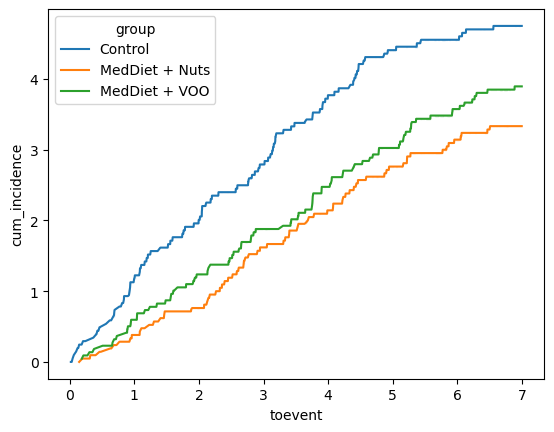

In [110]:
sns.lineplot(data=cummulative_cases, x='toevent', y='cum_incidence', hue='group')